In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
name_col = df.columns.tolist()
name_col

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [18]:
name_col[-1].split('(')[0]

'Concrete compressive strength'

In [24]:
name_col = [i.split('(')[0] for i in name_col]
name_col

['Cement ',
 'Blast Furnace Slag ',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age ',
 'Concrete compressive strength']

In [26]:
df.columns = name_col
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [32]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [34]:
df.duplicated().sum()

25

In [38]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [42]:
df.drop_duplicates(keep = 'first' , inplace=True)
df.duplicated().sum()

0

In [44]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [48]:
df.reset_index(drop = True,inplace=True)

In [50]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


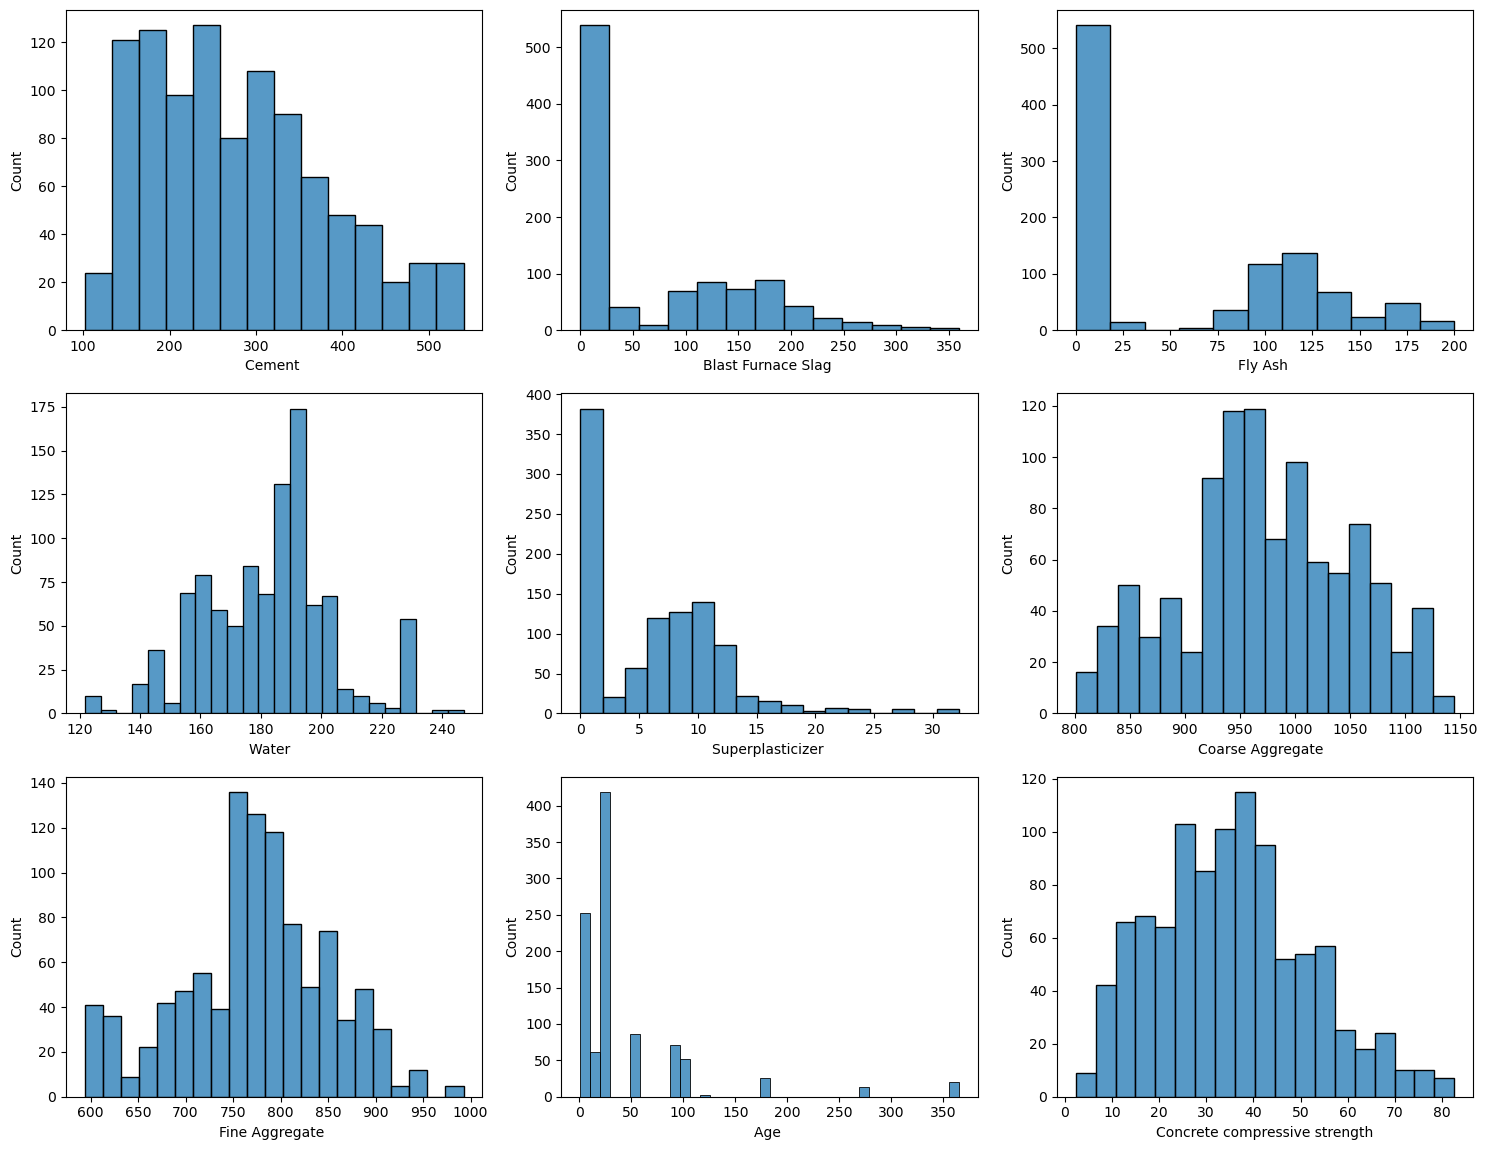

In [58]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

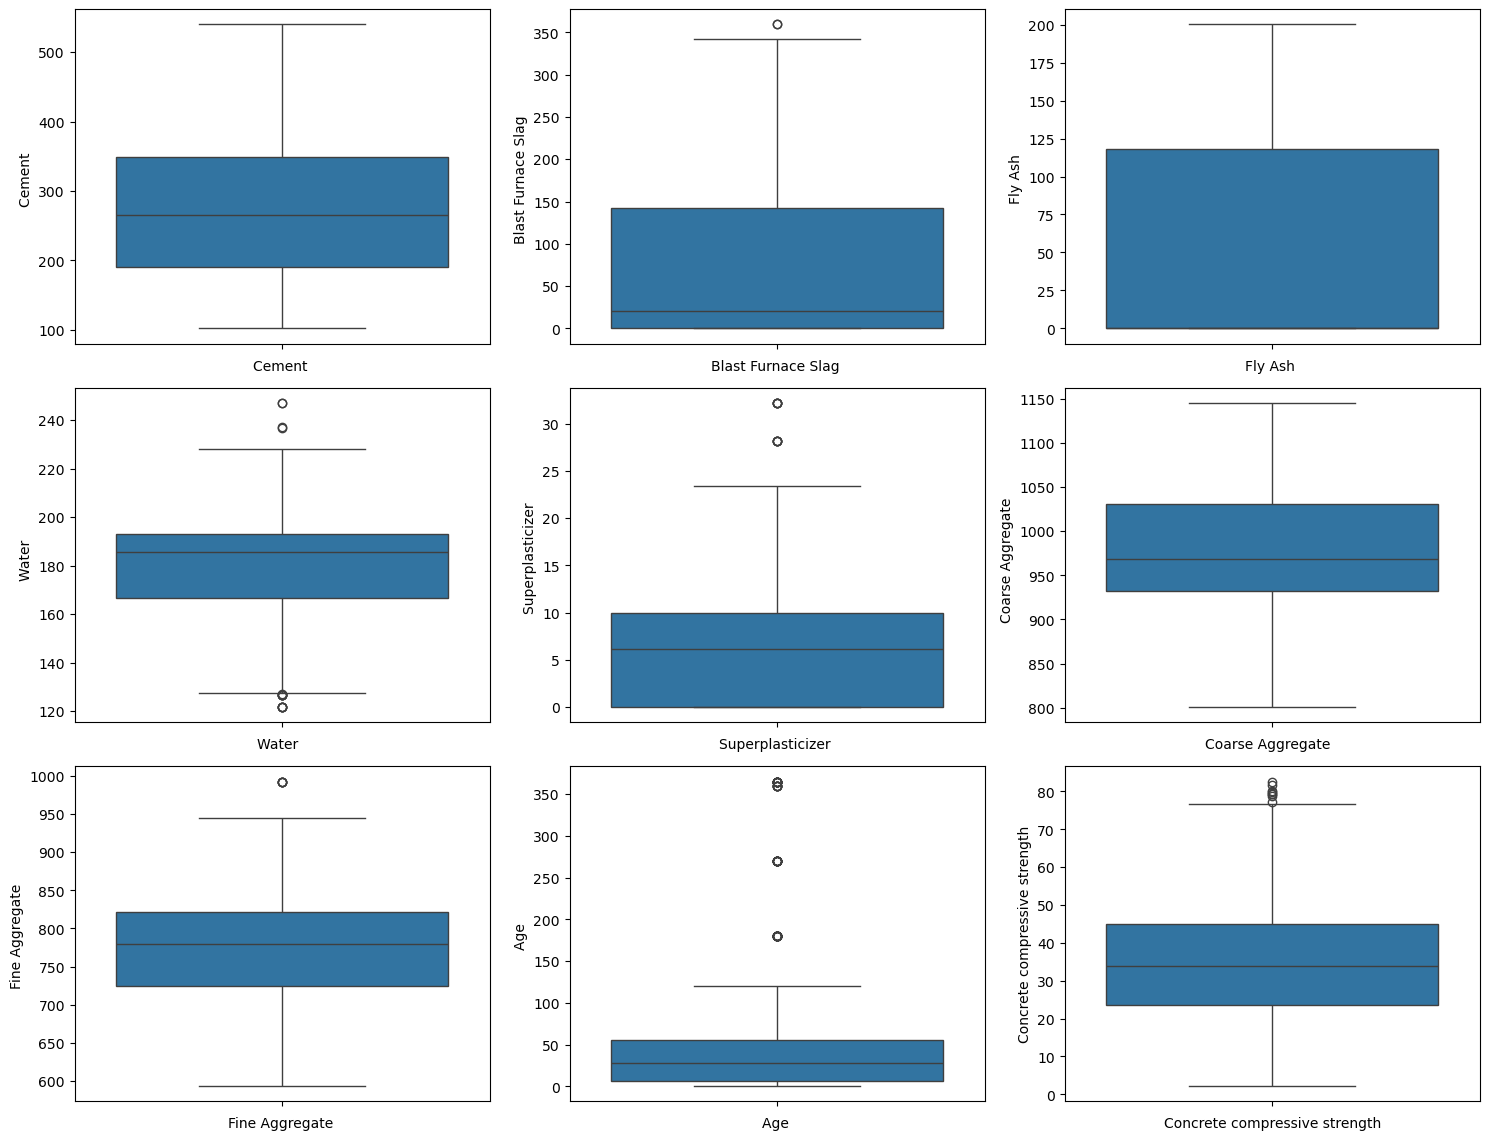

In [60]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [62]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [64]:
outliers = ['Blast Furnace Slag ','Water  ','Superplasticizer ','Fine Aggregate ', 'Age ']

In [76]:
import warnings
warnings.filterwarnings('ignore')


def outlier_capping(dataframe:pd.DataFrame , outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        df.loc[df[i] > upper_limit,i] = upper_limit
        df.loc[df[i] < lower_limit,i] = lower_limit
    return df
df = outlier_capping(dataframe = df, outliers = outliers)

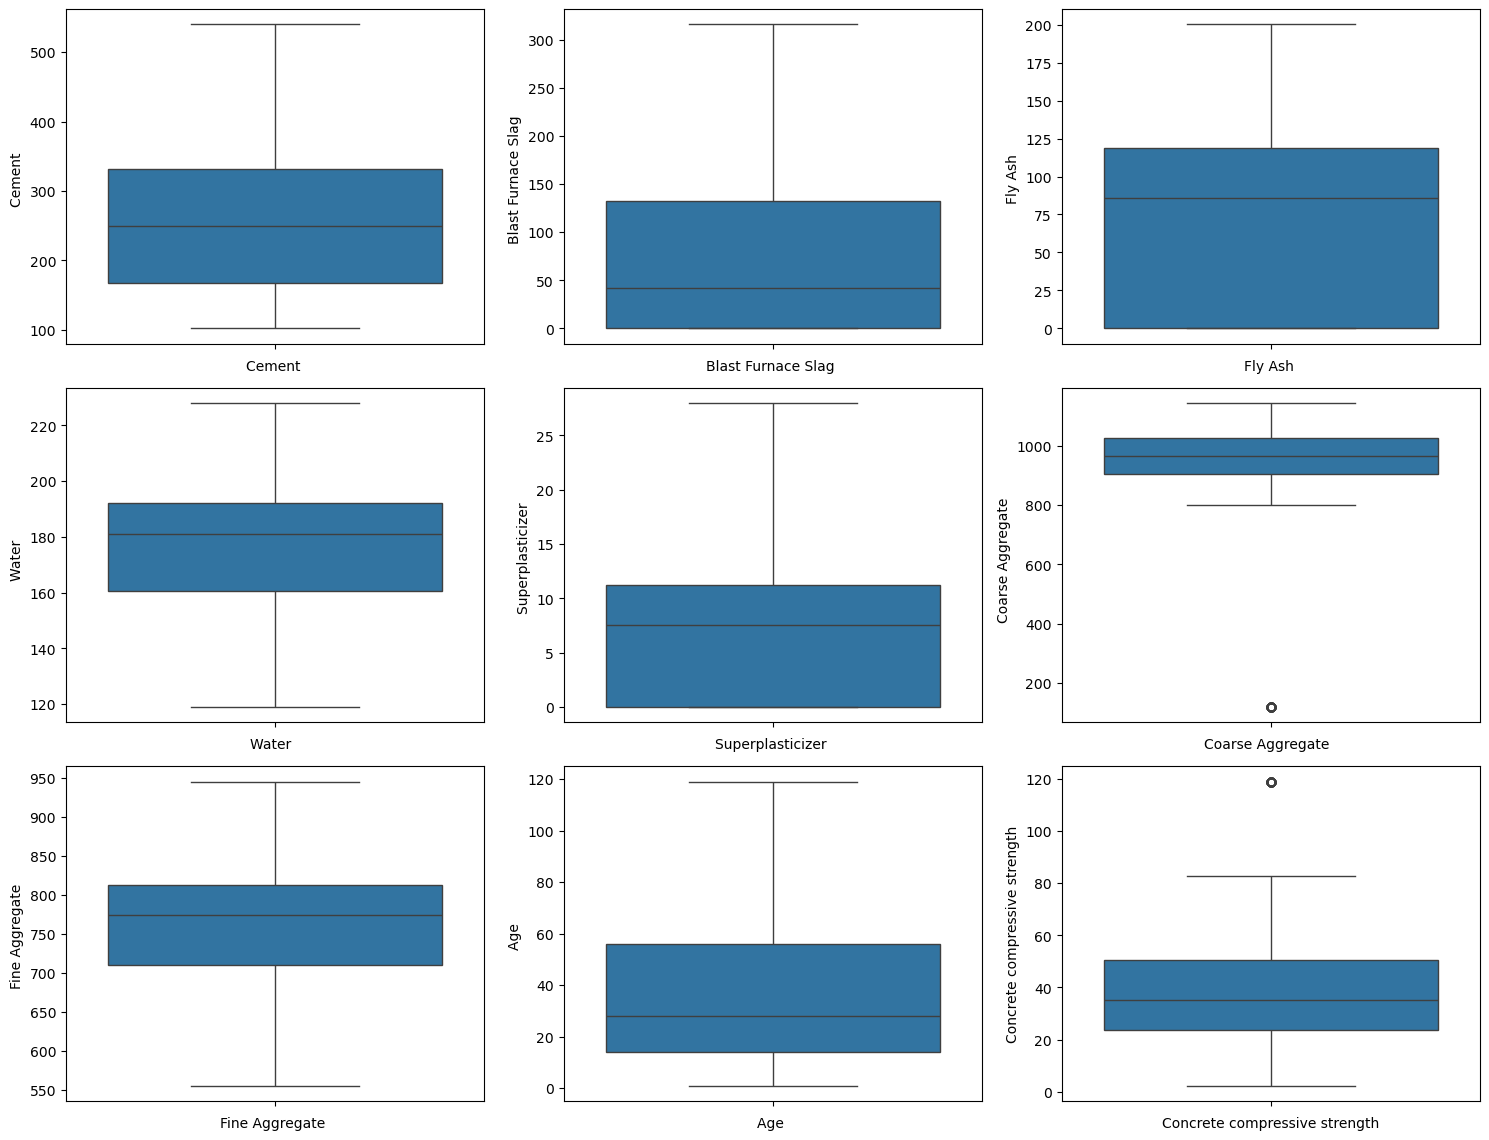

In [78]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [82]:
X = df.drop('Concrete compressive strength',axis = 1)
y = df['Concrete compressive strength']

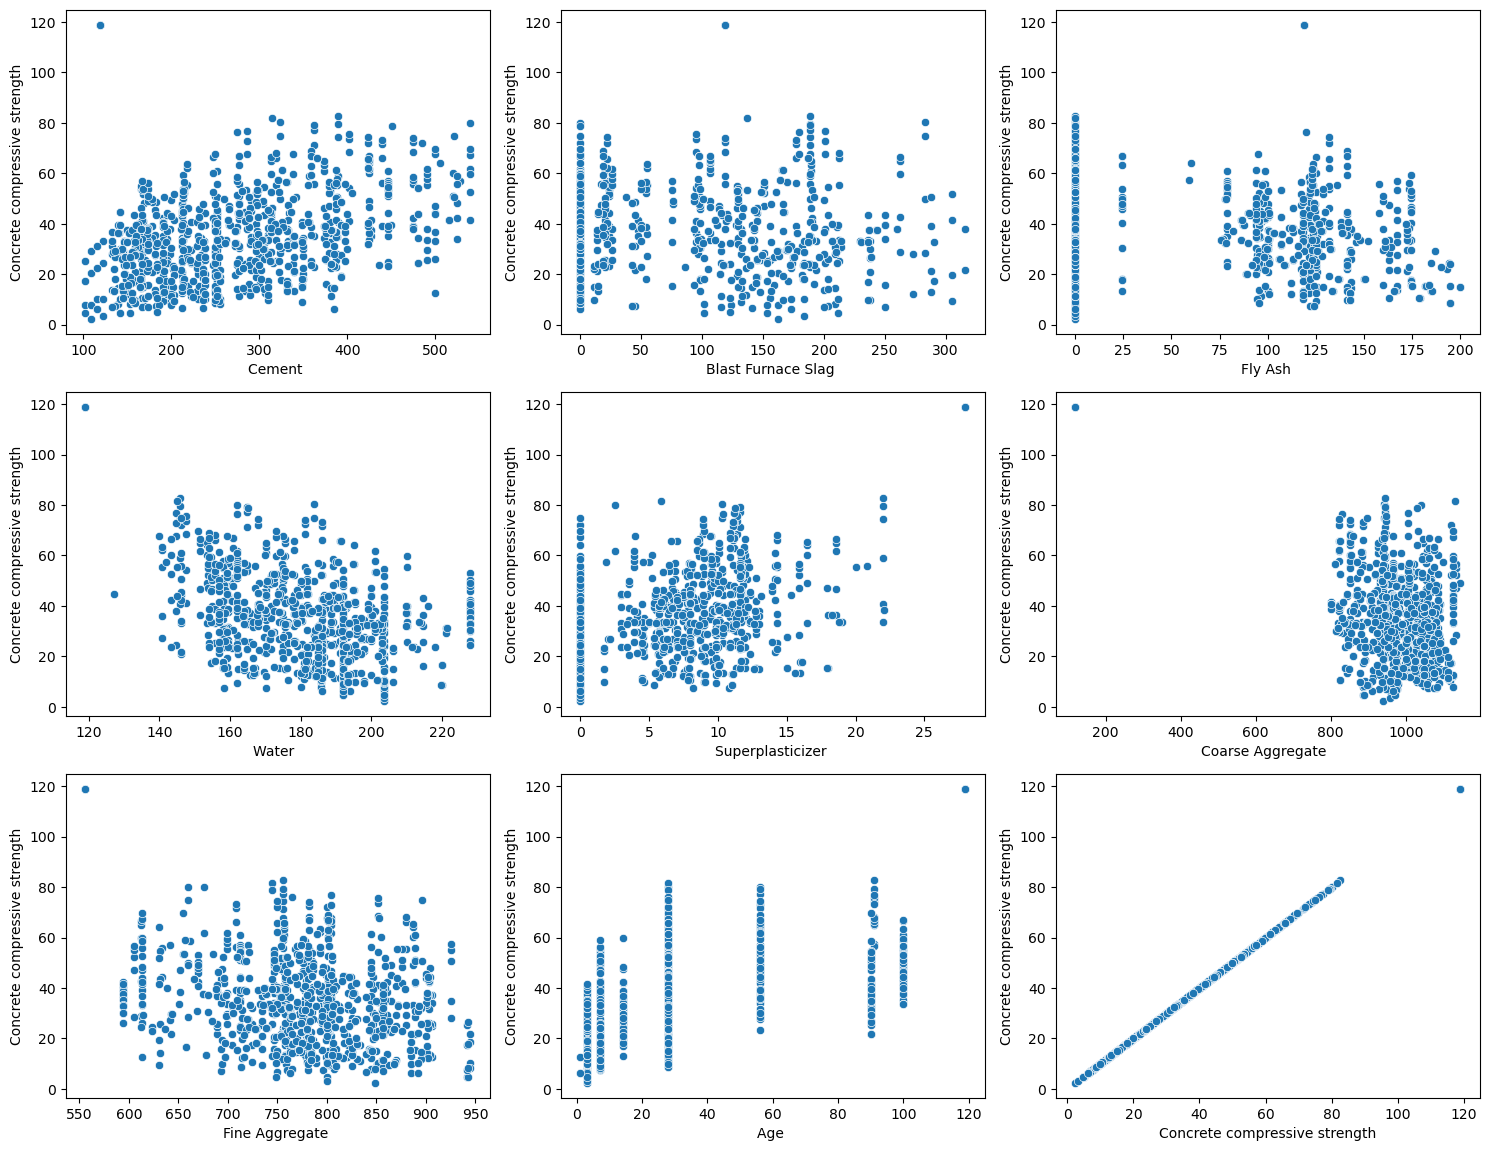

In [84]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=df[i],y=y)
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

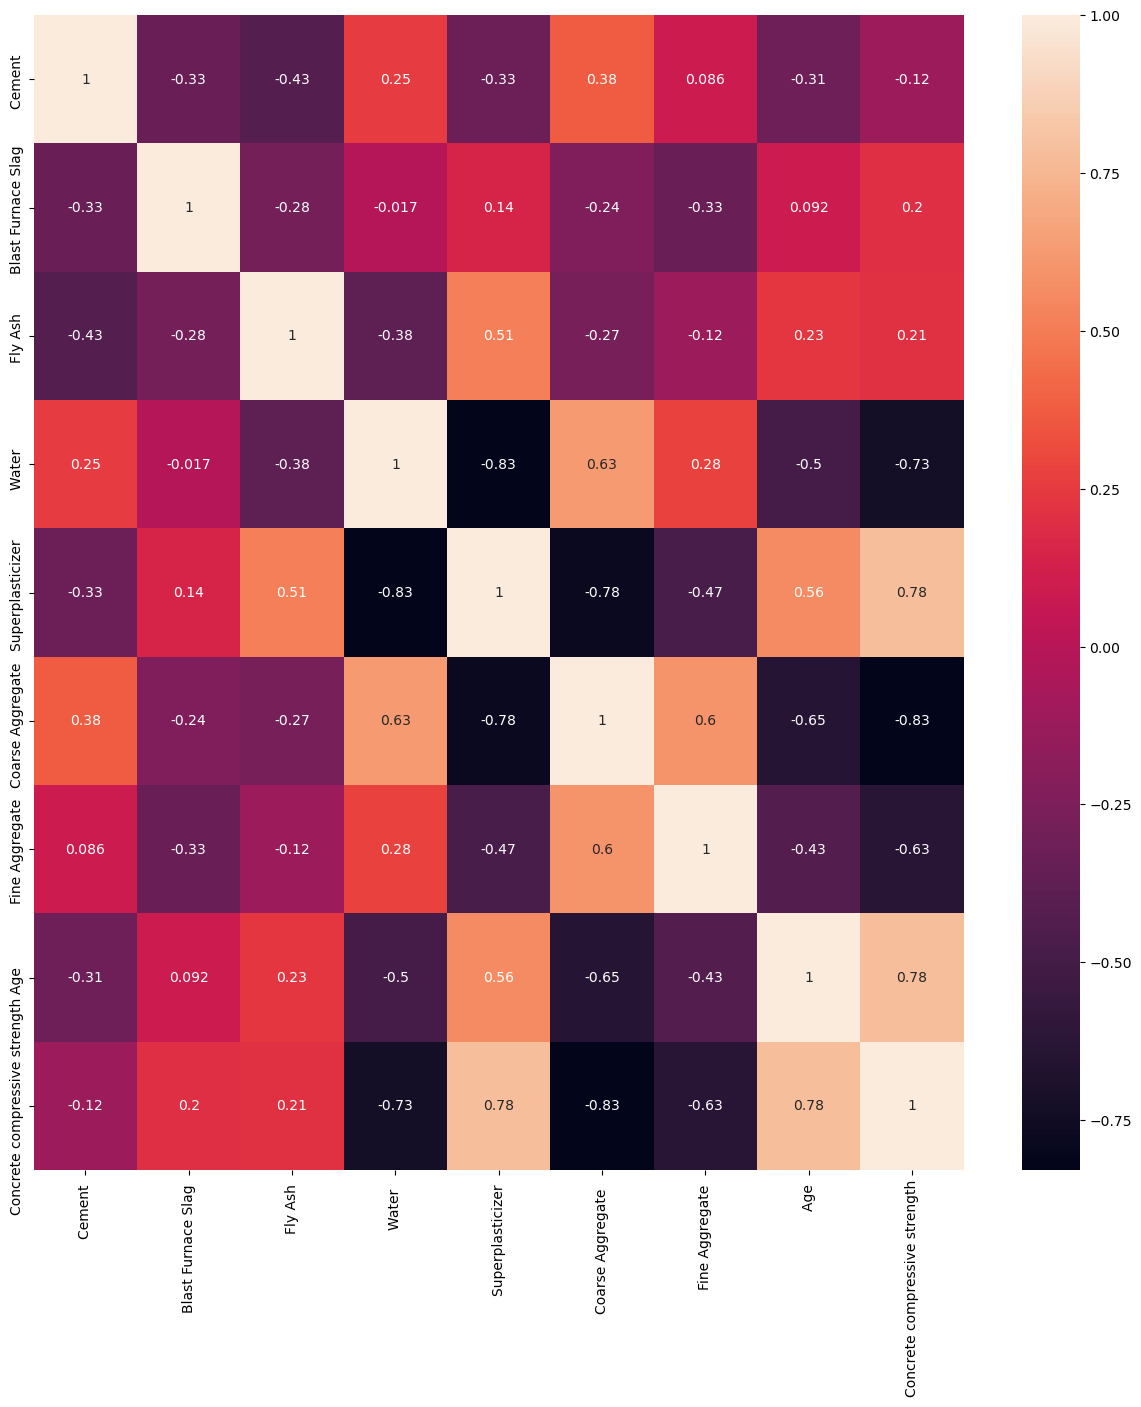

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [90]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error , r2_score

In [104]:
def check_model_performance(preprocessor , xtrain ,ytrain ,xtest ,ytest):
    models = {'Linear Regression ': LinearRegression(),
              'Ridge Regression': Ridge(alpha = 1),
              'Lasso Regression' : Lasso(alpha = 1),
              'Random Forest Regressor' : RandomForestRegressor(max_depth = 5),
              'GradientBoostingRegressor' : GradientBoostingRegressor(learning_rate = 0.1)}
    for model_name , model in models.items():
        pipeline = make_pipeline(preprocessor , model)
        pipeline.fit(xtrain , ytrain)
        y_pred = pipeline.predict(xtest)
        mse = mean_squared_error(ytest,y_pred)
        r2 = r2_score(ytest,y_pred)
        print(f'{model_name} - Mean squared error = {mse:.2f} \n {model_name} - r2 score {r2:.2f}')

In [106]:
preprocessor_1 = make_pipeline(KNNImputer(n_neighbors = 3) , StandardScaler())
preprocessor_2 = make_pipeline(KNNImputer(n_neighbors = 3) , RobustScaler())
preprocessor_3 = make_pipeline(KNNImputer(n_neighbors = 3) , MinMaxScaler())

print(f' { '=' *10 } Result for Standard Scaler {'='*10 }')
check_model_performance(preprocessor_1 , xtrain , ytrain , xtest , ytest)

print(f' {'=' *10 } Result for Robust Scaler {'='*10 }')
check_model_performance(preprocessor_2 , xtrain , ytrain , xtest , ytest)

print(f' { '='*10 } Result for MinMax Scaler {'='*10 }')
check_model_performance(preprocessor_3 , xtrain , ytrain , xtest , ytest)

 ========== Result for Standard Scaler ==========
Linear Regression  - Mean squared error = 70.99 
 Linear Regression  - r2 score 0.92
Ridge Regression - Mean squared error = 70.97 
 Ridge Regression - r2 score 0.92
Lasso Regression - Mean squared error = 77.84 
 Lasso Regression - r2 score 0.91
Random Forest Regressor - Mean squared error = 62.38 
 Random Forest Regressor - r2 score 0.93
GradientBoostingRegressor - Mean squared error = 31.76 
 GradientBoostingRegressor - r2 score 0.96
 ========== Result for Robust Scaler ==========
Linear Regression  - Mean squared error = 70.99 
 Linear Regression  - r2 score 0.92
Ridge Regression - Mean squared error = 71.00 
 Ridge Regression - r2 score 0.92
Lasso Regression - Mean squared error = 88.41 
 Lasso Regression - r2 score 0.90
Random Forest Regressor - Mean squared error = 62.73 
 Random Forest Regressor - r2 score 0.93
GradientBoostingRegressor - Mean squared error = 30.39 
 GradientBoostingRegressor - r2 score 0.96
 ========== Result f

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200],
              'learning_rate':[0.1,0.01],
              'max_depth': [5,3,7],
              'min_samples_split':[2,4],
              'min_samples_leaf':[1,2,3]}

gb_rg = GradientBoostingRegressor()

grid = GridSearchCV(gb_rg , param_grid, scoring = 'neg_mean_squared_error', cv = 5 , verbose = 1)
grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [114]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [116]:
grid.best_score_

-21.53477713004653

In [118]:
grid.best_estimator_

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=4,
                          n_estimators=200)

In [120]:
grid.best_estimator_.score(xtest,ytest)

0.9686429327970032

In [122]:
y_pred = grid.best_estimator_.predict(xtest)
mean_squared_error(ytest,y_pred)

26.555008057411197